# Выбор локации для скважины

## Загрузка и подготовка данных

Откроем файлы с данными и изучим их, для этого подключим библиотеку `pandas` помимо неё подключим еще остальные библиотеки, которые нам пригодятся. Для того чтобы прочитать данные из датасетов воспользуемся методом `read_csv`, для получения общей информации о датасетах воспользуемся методом `info`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('geo_data_0.csv')
    geo_data_1 = pd.read_csv('geo_data_1.csv')
    geo_data_2 = pd.read_csv('geo_data_2.csv')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


По данным видно, что пропусков в столбцах нет, также сразу можно заметить, что у всех столбцов корректный тип данных. Наименование столбцов корректное, соотвествуют стандарту Python. Проверим нет ли явных дубликатов в датасетах, вдруг продублировали скважину с одним id и одинаковыми числовыми данными несколько раз:

In [8]:
print(geo_data_0.duplicated().sum())
print(geo_data_1.duplicated().sum())
print(geo_data_2.duplicated().sum())

0
0
0


Посмотрим теперь на корреляцию данных в разных регионах:

In [9]:
geo_data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [10]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [11]:
geo_data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


По корреляциям видно, что между собой корреляриуют столбцы `f2` и `product` особенно это заметно во 2 регионе, где корреляция у этих столбцов почти равна 1 и составляет **0.99**, что говорит о том у этих столбцев сильная положительная взаимосвязь, то есть при увелечений значений в столбце `f2`, будет увеличено и значение в столбце `product`. В 1 и 3 регионе тоже корреляриуют столбцы `f2` и `product`, но не так выражено как во 2 регионе, значения корреляций равны **0.48** и **0.44** соответственно, можно сказать что здесь почти что средняя взаимосвязь между столбцами `f2` и `product`. По остальным столбцам корреляции равно почти нулю, что говорит о том что между столбцами либо нет взаимосвязи, либо она очень слабая.

Мы сделали подготовку данных можем теперь переходить к обучению моделей для решения нашей задачи.

## Обучение и проверка модели

Прежде, чем разделить данные на выборки, уберем из датасетов те столбцы, которые нам не пригодятся в обучении модели — это столбец:

- `id` — уникальный идентификатор скважины.

Это техниеский столбец, он не несет никакой информации о запасах нефти, поэтому им можно пренебречь:

In [12]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [13]:
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [14]:
geo_data_2 = geo_data_2.drop(['id'], axis=1)
geo_data_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


Столбец `id` во всех датасетах удалился корректно. Теперь в датасетах остались только столбцы с числовыми данными, то есть количественные признаки. Числовые значения в столбцах `f0`, `f1`, `f2` имеют небольшой разброс значений и также судя по всему имеют примерно одинаковый диапазон значений, поэтому данные признаки можно не масштабировать. Можем переходить к обучению модели для предсказания запасов нефти в разных регионах, но перед этим разделим данные из каждого региона на обучающую и валидационную выборки в соотношении 75:25:

In [15]:
geo_data_0_train, geo_data_0_valid = train_test_split(geo_data_0, test_size=0.25, random_state=12345)
geo_data_1_train, geo_data_1_valid = train_test_split(geo_data_1, test_size=0.25, random_state=12345)
geo_data_2_train, geo_data_2_valid = train_test_split(geo_data_2, test_size=0.25, random_state=12345)
print(geo_data_0_train.shape)
print(geo_data_0_valid.shape)
print(geo_data_1_train.shape)
print(geo_data_1_valid.shape)
print(geo_data_2_train.shape)
print(geo_data_2_valid.shape)

(75000, 4)
(25000, 4)
(75000, 4)
(25000, 4)
(75000, 4)
(25000, 4)


Теперь разделим данных во всех выборках для обучения и проверки модели, для этого напишем небольшую функцию, которая будет разделять данные по признакам. В качестве признаков будем брать значения в столбцах `f0`, `f1`, `f2`, а в качестве целового признака, который необходимо будет предсказать, значение в столбце `product` — объём запасов в скважине:

In [16]:
def split_features(name_column_target_features, data):
    '''
    Функция разделяет данные по признакам
    '''
    features = data.drop([name_column_target_features], axis=1)
    target = data[name_column_target_features]
    
    return features, target

In [17]:
geo_data_0_train_features, geo_data_0_train_target = split_features('product', geo_data_0_train)
geo_data_1_train_features, geo_data_1_train_target = split_features('product', geo_data_1_train)
geo_data_2_train_features, geo_data_2_train_target = split_features('product', geo_data_2_train)

geo_data_0_valid_features, geo_data_0_valid_target = split_features('product', geo_data_0_valid)
geo_data_1_valid_features, geo_data_1_valid_target = split_features('product', geo_data_1_valid)
geo_data_2_valid_features, geo_data_2_valid_target = split_features('product', geo_data_2_valid)

'''
geo_data_train_features = geo_data_train.drop(['product'], axis=1)
geo_data_train_target = geo_data_train['product']

geo_data_0_valid_features = geo_data_0_valid.drop(['product'], axis=1)
geo_data_0_valid_target = geo_data_0_valid['product']

geo_data_1_valid_features = geo_data_1_valid.drop(['product'], axis=1)
geo_data_1_valid_target = geo_data_1_valid['product']

geo_data_2_valid_features = geo_data_2_valid.drop(['product'], axis=1)
geo_data_2_valid_target = geo_data_2_valid['product']
'''
pass

Данные по признакам разделили, теперь можно приступать к обучении модели машинного обучения. Для решения нашей задачи, предсказания запасов нефти в разных регионах, возьмем модель **Линейной регрессии**, данная модель нам подходит, так как у нас только числовые признаки и она достаточно предсказуема по сравнению с другими моделями. Так как у нас несколько регионов, то на каждый регион будет обучена отдельная модель, для этого напишем отдельную функцию по обучению моделей.  Для определения насколько хорошо обучилась модель будет использовать метрику *RMSE*, так как у нас задача регрессии.

In [18]:
def learn_model(features_data, target_data):
    '''
    Функция обучает модели Линейной регрессии
    '''
    model_linear_reg = linear_model.LinearRegression()
    model_linear_reg.fit(features_data, target_data)
    
    return model_linear_reg

Обучим модели для каждого региона:

In [19]:
model_linear_reg_geo_data_0 = learn_model(geo_data_0_train_features, geo_data_0_train_target)
model_linear_reg_geo_data_1 = learn_model(geo_data_1_train_features, geo_data_1_train_target)
model_linear_reg_geo_data_2 = learn_model(geo_data_2_train_features, geo_data_2_train_target)

Модели обучили, теперь запишем в отдельные переменные предсказания по каждой валидационной выборке, которые соответствуют различным регионам:

In [20]:
predictions_geo_data_0 = model_linear_reg_geo_data_0.predict(geo_data_0_valid_features)
predictions_geo_data_1 = model_linear_reg_geo_data_1.predict(geo_data_1_valid_features)
predictions_geo_data_2 = model_linear_reg_geo_data_2.predict(geo_data_2_valid_features)

Посмотрим теперь средний запас предсказанного сырья для каждого региона и *RMSE* модели:

In [21]:
print('Средний запас предсказанного сырья у 1-го региона', predictions_geo_data_0.mean())
print('Средний запас предсказанного сырья у 2-го региона', predictions_geo_data_1.mean())
print('Средний запас предсказанного сырья у 3-го региона', predictions_geo_data_2.mean())

Средний запас предсказанного сырья у 1-го региона 92.59256778438035
Средний запас предсказанного сырья у 2-го региона 68.728546895446
Средний запас предсказанного сырья у 3-го региона 94.96504596800489


Рассчитаем *RMSE* моделей по каждому региону по отдельности:

In [22]:
#geo_data_valid_target = pd.concat([geo_data_0_valid_target, geo_data_1_valid_target, geo_data_2_valid_target])
#predictions_geo_data = pd.concat([pd.Series(predictions_geo_data_0), pd.Series(predictions_geo_data_1), 
#                                  pd.Series(predictions_geo_data_2)])
#print('RMSE модели', mean_squared_error(geo_data_valid_target, predictions_geo_data) ** 0.5)

In [23]:
print('RMSE модели 1-го региона', mean_squared_error(geo_data_0_valid_target, predictions_geo_data_0) ** 0.5)
print('RMSE модели 2-го региона', mean_squared_error(geo_data_1_valid_target, predictions_geo_data_1) ** 0.5)
print('RMSE модели 3-го региона', mean_squared_error(geo_data_2_valid_target, predictions_geo_data_2) ** 0.5)

RMSE модели 1-го региона 37.5794217150813
RMSE модели 2-го региона 0.8930992867756168
RMSE модели 3-го региона 40.02970873393434


*RMSE* у всех моделей разный, самый хороший *RMSE* у модели по 2 региону — **0.89**, что говорит о том, что модель практическии идеально предсказывает запасы нефти по переданным признакам. *RMSE* модели у 1 и 3 региона не такой хороший как у модели по 2 региону и равен **37.57** и **40.02** соответственно, чтобы понять насколько это хорошо или плохо, посмотрим минимальное и максимальное значение целевого признака из валидационных выборок по каждому региону:

In [24]:
print('Минимальный объем запасов в скважине во 1-ом регионе', geo_data_0_valid_target.min())
print('Максимальный объем запасов в скважине во 1-ом регионе', geo_data_0_valid_target.max())

print('Минимальный объем запасов в скважине во 2-ом регионе', geo_data_1_valid_target.min())
print('Максимальный объем запасов в скважине во 2-ом регионе', geo_data_1_valid_target.max())

print('Минимальный объем запасов в скважине во 3-ем регионе', geo_data_2_valid_target.min())
print('Максимальный объем запасов в скважине во 3-ем регионе', geo_data_2_valid_target.max())

Минимальный объем запасов в скважине во 1-ом регионе 0.0040215231561772
Максимальный объем запасов в скважине во 1-ом регионе 185.315412459934
Минимальный объем запасов в скважине во 2-ом регионе 0.0
Максимальный объем запасов в скважине во 2-ом регионе 137.94540774090564
Минимальный объем запасов в скважине во 3-ем регионе 0.0
Максимальный объем запасов в скважине во 3-ем регионе 190.01098161509907


Диапазон значений по запасам нефти начинается с **0.004** и заканчивается **185** тыс.баррелей в 1 регионе и начинается с **0** и заканчивается **190** тыс.баррелей в 3 регионе, с учетом того, что на метрику *RMSE* могли сильно повлиять значения определенные модели как сильно большие, а в валидационной выборке эти значения наоборот слишком маленькие, то есть модель определила, что в некой скважине 10 тыс.баррелей нефти, а в валидационной выборке в этой скважине указана, допустим, 150 тыс.баррелей нефти, в следствии чего и растет значение по метрике *RMSE*. Так как метрика *RMSE* чувствительна к большим значениям, оценим ещё качество наших модели по метрике *R2*:

In [25]:
print("R2 модели 1-го региона =", r2_score(geo_data_0_valid_target, predictions_geo_data_0))
print("R2 модели 2-го региона =", r2_score(geo_data_1_valid_target, predictions_geo_data_1))
print("R2 модели 3-го региона =", r2_score(geo_data_2_valid_target, predictions_geo_data_2))

R2 модели 1-го региона = 0.27994321524487786
R2 модели 2-го региона = 0.9996233978805127
R2 модели 3-го региона = 0.20524758386040443


Метрика *R2* не отрицательная и не равна нулю для моделей по каждому региону, самый лучший показатель по данной метрике у модели по 2 региону — **0.99**, что ещё раз подтверждает что модель по 2 региону практические иделаьно предсказывает ответы. Метрика *R2* по 1 и 3 регионы имеет значение **0.279** и **0.205** соответственно, что говорит о том, что данные модели достаточно обучились, чтобы использовать их дальше, у моделей не низкое качество, так как у них не отрицательные значения по метрике *R2* и они не работают так, как и среднее, потому что у них значения по метрике *R2* больше нуля. Можно переходить к расчёту прибыли.

## Подготовка к расчёту прибыли

Прежде чем рассчитывать прибыль, запишем в отдельные переменные ключевые значения для расчетов. Нам известные из условий задачи следующие данные:

- при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки;
- бюджет на разработку скважин в регионе — 10 млрд рублей;
- доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [26]:
COUTN_POINT_OIL = 500 #кол-во точек с запасами нефти, которые исследуют в регионе
COUNT_POINT_PREDICT = 200 #кол-во точек с запасами нефти, который выбирают для разработки скважин с помощью машинного 
                          #обучения
BUDGET_WELLS = 10_000_000_000 #бюджет на разработку скважины
REVENUE_OIL = 450_000 #доход с каждой единицы продукты, в датасетах объем указан в тыс. баррелей

Ключевые значения в переменные записали, теперь можем рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Чтобы рассчитать объема сырья разделим бюджет на разработку скважин в регионе на количество точек, которые выбирают для разработки скважин, затем полученное число разделим на доход с каждой единицы продукта:

In [27]:
profit_well_oil = (BUDGET_WELLS / COUNT_POINT_PREDICT) / REVENUE_OIL
profit_well_oil

111.11111111111111

Чтобы скважина была безубыточной, необходимо, чтобы в ней было запасов нефти на **111.11** тыс. баррелей. Посмотрим средний запас сырья в каждом из трех регионов:

In [28]:
print('Запас сырья в 1-ом регионе', geo_data_0['product'].mean())
print('Запас сырья в 2-ом регионе', geo_data_1['product'].mean())
print('Запас сырья в 3-ом регионе', geo_data_2['product'].mean())

Запас сырья в 1-ом регионе 92.49999999999974
Запас сырья в 2-ом регионе 68.82500000002561
Запас сырья в 3-ом регионе 95.00000000000041


Как видно по данным ни в одном регионе не достаточно среднего объема сырья, чтобы стать безубыточным регионом по разработке скважин, что говорит о том, что в каждом регионе необходимо разрабатывать скважины только в тех точках, где объем сырья равен или больше объема сырья для безубыточной разработки.

## Расчёт прибыли и рисков

Нам известно сколько нужно объемов сырья, чтобы безубыточное разрабатывать скважины в регионе, напишем функцию для расчета прибыли по выбранным скважинам, затем расчитаем возможные риски для каждого региона. Чтобы найти распределение прибыли воспользуемся техникой *Bootstrap* с 1000 выборок. Для расчета убытков воспользуемся 95%-й доверительным интервалом, в таком случае вероятность убытков в регионе должна быть не меньше 2.5%:

Функция для расчета прибыли будет работать по следующему алгоритму:
1. Выбираются скважины с предсказанным максимальным запасом сырья
2. Суммируются запасы сырья по выбранным скважинам
3. Рассчитывает прибыль для полученного объема сырья

In [29]:
def revenue(valid_product, prediction_product, count, price_one_oil):
    '''
    Функция рассчитывать прибыль по выбранным скважинам по предсказаниям модели
    '''
    prediction_product_sorted = prediction_product.sort_values(ascending=False)
    valid_product_selected = valid_product[prediction_product_sorted.index][:count]
    
    return (valid_product_selected.sum() * price_one_oil) - BUDGET_WELLS

Напишем отдельную функцию для применения техники *Bootstrap* с 1000 выборок чтобы найти распределение прибыли в каждом регионе:

In [30]:
def bootstrap(valid_data_product, prediction_data_product, choice_cnt_point, prediction_cnt_point, price_one_oil):
    revenue_product = []
    state = np.random.RandomState(12345)
    
    for i in range(1000):
        valid_data_product_subsample = valid_data_product.sample(n=choice_cnt_point, replace=True, random_state=state)
        prediction_data_product_subsample = prediction_data_product[valid_data_product_subsample.index]
        
        revenue_product.append(revenue(valid_data_product_subsample, prediction_data_product_subsample, 
                                       prediction_cnt_point, price_one_oil))
        
    return revenue_product

Функции подготовленные, теперь найдем среднюю прибыль, долю отрицательной прибыли для каждого региона и **95%**-й доверительный интервал.

Для расчета средней прибыли будем использовать технику *Bootstrap* с 1000 выборок, по условиям задачи нам необходимо будет из выборок выбирать 500 точек и потом с помощью машинного обучения, то есть из выборки где мы сделали предсказания, необходимо выбрать 200 лучших точек для разработки скважин. Рассчитаем среднюю прибыль и риск убытков для каждого региона по отдельности.

Чтобы найти долю отрицательной прибыли, из полученной выборки с помощью техники *Bootstrap* будет искать количество точек с отрицательной прибылью от общего числа точек, затем полученное число необходимо будет разделить на общее число точек в выборке. Согласно условию задачи вероятность риска убытков должена быть меньше **2.5%**. 

Для определения **95%**-й доверительного интервала будет искать **2.5%**-квантиль и **97.5%**-квантиль, так мы сможем найти две границы доверительного интервала, левую и правую.

Для расчета прибыли по каждому региону напишем отдельную функцию:

In [31]:
def calc_revenue_by_region(data_target, data_predictions):
    '''
    Функция рассчитывает прибыль по региону
    '''
    data_target = pd.concat([data_target], ignore_index=True)
    data_predictions = pd.Series(data_predictions)
    
    revenue_product_by_data = bootstrap(data_target, data_predictions, COUTN_POINT_OIL, COUNT_POINT_PREDICT, REVENUE_OIL)
    return pd.Series(revenue_product_by_data)

In [32]:
revenue_product_by_geo_data_0 = calc_revenue_by_region(geo_data_0_valid_target, predictions_geo_data_0)
print('Средняя прибыль из 1 региона', revenue_product_by_geo_data_0.mean())

risk_of_loss_by_geo_data_0 = (revenue_product_by_geo_data_0[revenue_product_by_geo_data_0.values < 0].count() / 
                             revenue_product_by_geo_data_0.count())
print(f'Риск убытков в 1 регионе {risk_of_loss_by_geo_data_0:.1%}')

print('Левая граница 95% доверительного интервала', revenue_product_by_geo_data_0.quantile(0.025), 
      'Правая граница 95% доверительного интервала', revenue_product_by_geo_data_0.quantile(0.975))

Средняя прибыль из 1 региона 425938526.910592
Риск убытков в 1 регионе 6.0%
Левая граница 95% доверительного интервала -102090094.83793654 Правая граница 95% доверительного интервала 947976353.3583689


In [33]:
revenue_product_by_geo_data_1 = calc_revenue_by_region(geo_data_1_valid_target, predictions_geo_data_1)
print('Средняя прибыль из 2 региона', revenue_product_by_geo_data_1.mean() / 1_000_000)

risk_of_loss_by_geo_data_1 = (revenue_product_by_geo_data_1[revenue_product_by_geo_data_1.values < 0].count() / 
                             revenue_product_by_geo_data_1.count())
print(f'Риск убытков в 2 регионе {risk_of_loss_by_geo_data_1:.1%}')

print('Левая граница 95% доверительного интервала', revenue_product_by_geo_data_1.quantile(0.025), 
      'Правая граница 95% доверительного интервала', revenue_product_by_geo_data_1.quantile(0.975))

Средняя прибыль из 2 региона 515.2227734432901
Риск убытков в 2 регионе 1.0%
Левая граница 95% доверительного интервала 68873225.37050176 Правая граница 95% доверительного интервала 931547591.2570494


In [34]:
revenue_product_by_geo_data_2 = calc_revenue_by_region(geo_data_2_valid_target, predictions_geo_data_2)
print('Средняя прибыль из 2 региона', revenue_product_by_geo_data_2.mean())

risk_of_loss_by_geo_data_2 = (revenue_product_by_geo_data_2[revenue_product_by_geo_data_2.values < 0].count() / 
                             revenue_product_by_geo_data_2.count())
print(f'Риск убытков в 3 регионе {risk_of_loss_by_geo_data_2:.1%}')

print('Левая граница 95% доверительного интервала', revenue_product_by_geo_data_2.quantile(0.025), 
      'Правая граница 95% доверительного интервала', revenue_product_by_geo_data_2.quantile(0.975))

Средняя прибыль из 2 региона 435008362.782756
Риск убытков в 3 регионе 6.4%
Левая граница 95% доверительного интервала -128880547.32978901 Правая граница 95% доверительного интервала 969706954.1802661


Во всех трех регионах средняя прибыль полученная с помощью техники *Bootstrap* не отрицательная, что вроде бы как говорит о том, что в каждом регионе можно разрабатывать скважины. Однако, в 1 и 3 регионе, левая граница **95%** доверительного интервала отрицательная, что говорит о том, что при разработке этих скважин в этих регионах с вероятность **2.5%** можно получить отрицательную прибыль, которая указана в левой границе доверительного интервала. Согласно расчетам риск убытка в 1 и 3 регионе составляет **6%** и **6.4%**, а по условиям задачи риск убытка должен быть менее **2.5%**, под эти критерии у нас подходит 2 регион, у него риск убытка составляет всего **1%**, левая граница **95%** доверительного интервала положительная, а также самая высокая средняя прибыль по сравнению с другими регионами. 

Посмотрим ещё на распределение прибыли со скважин в разных регионах, чтобы убедиться в правильном выборе регионе для разработки скважин, для этого построим графики по каждому региону с помощью метода `plot` из библиотеки `pandas`:

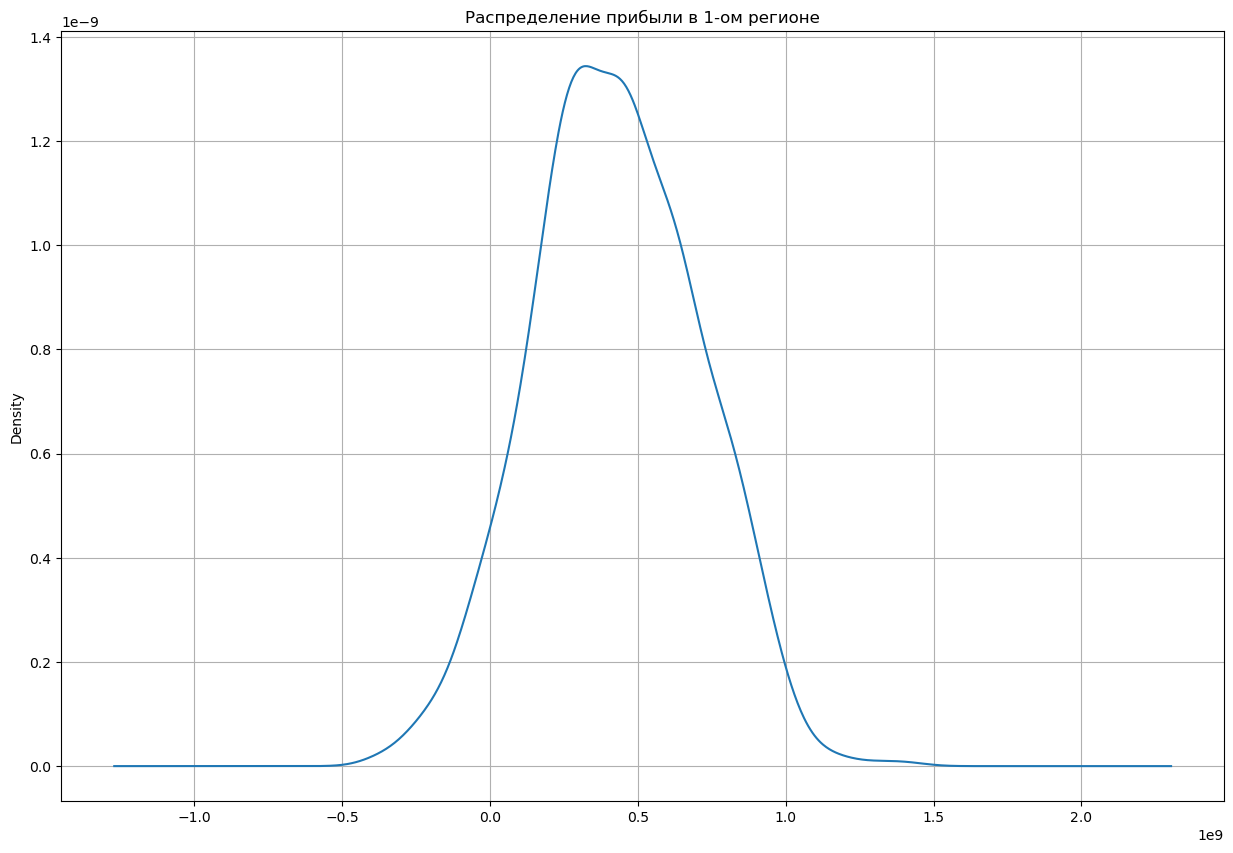

In [35]:
revenue_product_by_geo_data_0.plot(kind='kde', grid=True, figsize=(15, 10), title='Распределение прибыли в 1-ом регионе')
plt.show()

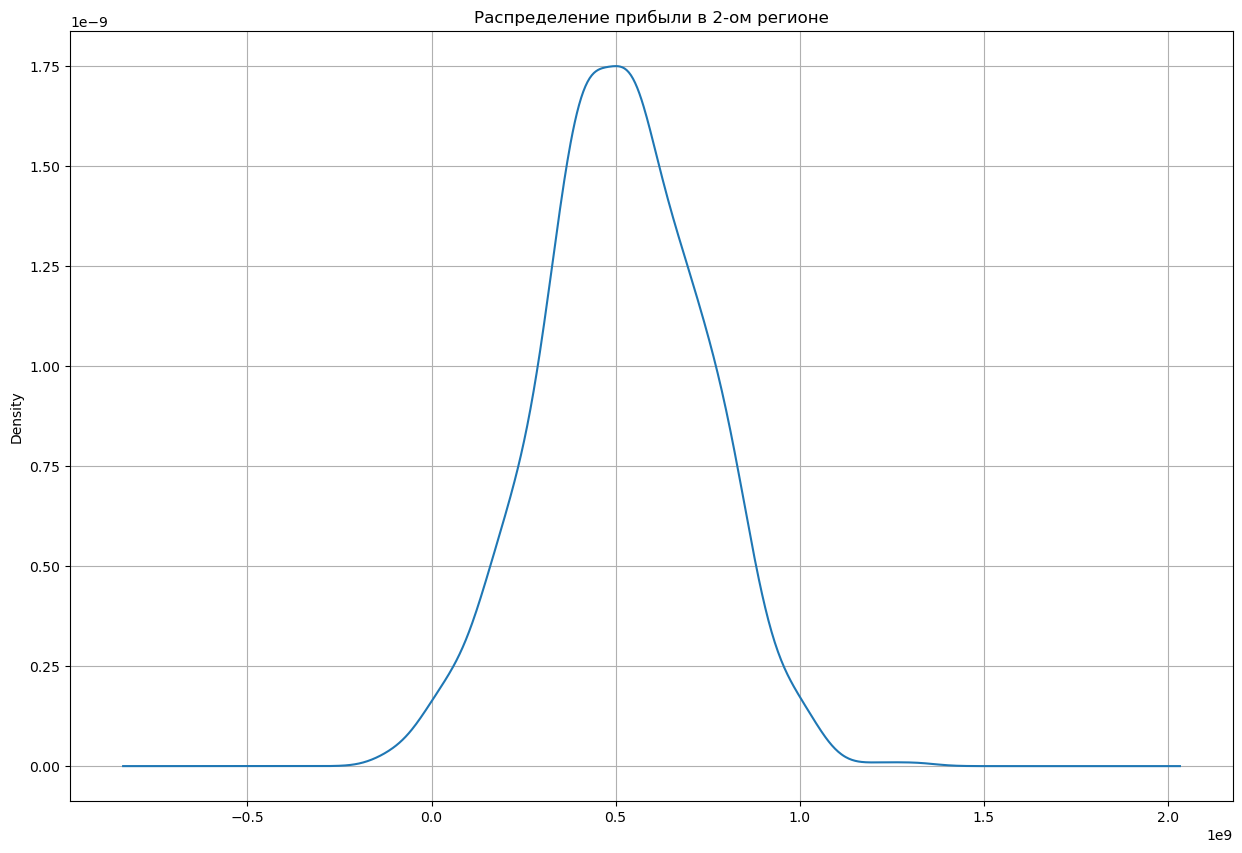

In [36]:
revenue_product_by_geo_data_1.plot(kind='kde', grid=True, figsize=(15, 10), title='Распределение прибыли в 2-ом регионе')
plt.show()

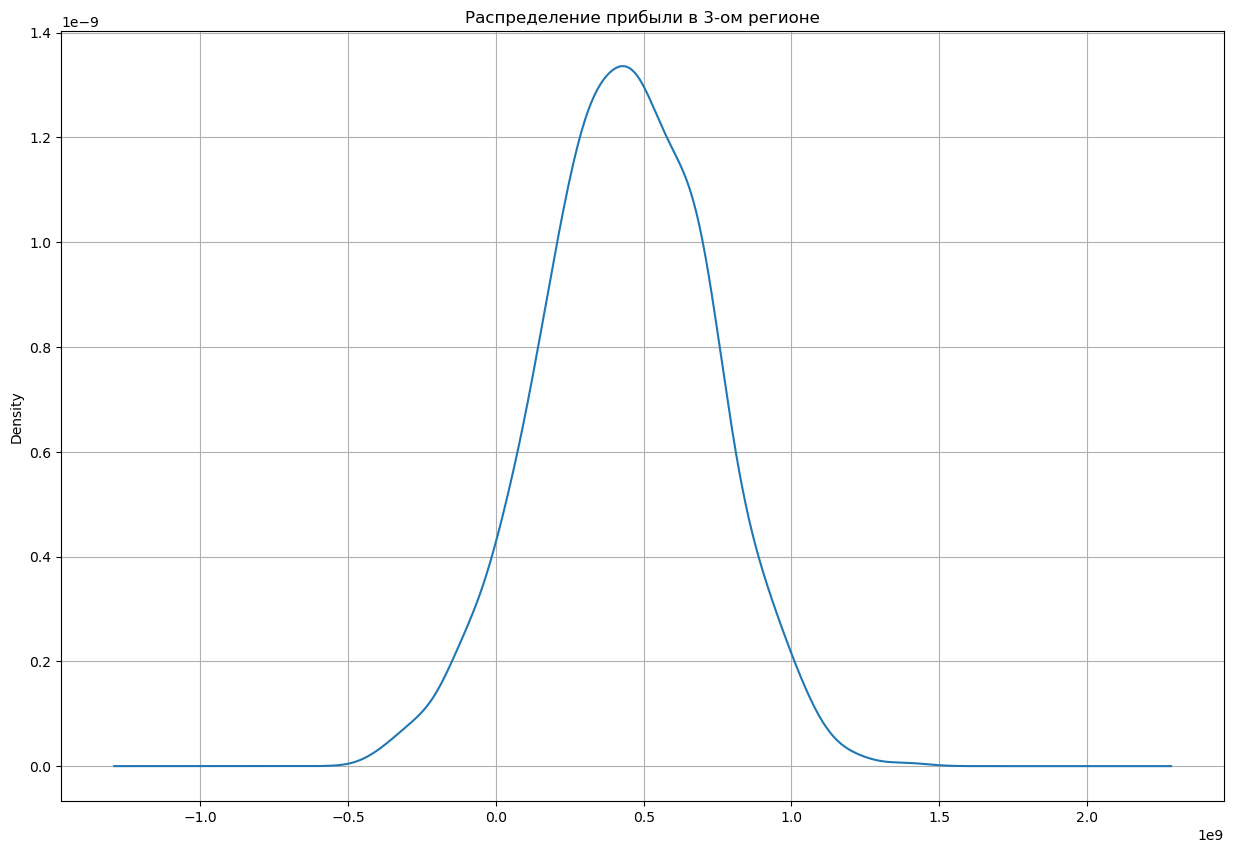

In [37]:
revenue_product_by_geo_data_2.plot(kind='kde', grid=True, figsize=(15, 10), title='Распределение прибыли в 3-ом регионе')
plt.show()

Как видно по графикам во всех трех регионах прибыль со скважин имеет нормально распределение. Если смотреть на графиках на область под прямой начиная с 0 по оси абсцисс, в нашем случае на графике в этой точке начинается прибыль при разработке скважин в регионе, то можно увидеть, что на графике по 2 региону эта область будет самая большая по сравению с другими регионами, что говорит о том, что лучше всего разрабатывать скважину в этом регионе.  

### Общий вывод

В рамках задачи нам нужно было обучить модель машинного обучения которая поможет определить регион, где добыча принесёт наибольшую прибыль. В качестве модели машинного обучения была выбрана модель **Линейной регрессии**. Чтобы рассчитать  возможную прибыль и риски была использована техника *Bootstrap*, с помощью которой была рассчитана возможность прибыль по предсказанным запасам нефти в трех разных регионах, получены следующие результаты:

Во всех трех регионах можно разрабатывать скважины и есть вероятность получить прибыль с учетом затраченного бюджета в 10 млрд рублей, однако прибыль во всех трех регионах разная, а также разный риск убытков:

- 1-ый регион — **6%** риск убытков;
- 2-ой регион — **1%** риск убытков;
- 3-ий регион — **6.4%** риск убытков.


- 1-ый регион — **425.93** млн. рублей прибыли;
- 2-ой регион — **515.22** млн. рублей прибыли;
- 3-ий регион — **435** млн. рублей прибыли.

Как видно по списку больше всего прибыли в 2 регионе и она составляет **515.22** млн. рублей. Также в данном регионе самый низкий риск убытка — **1%**.

На основани вышеизложеннго рекомендуется разрабатывать скважины в 2 регионе, так как в нем больше всего прибыльных скважин и самый низкий риск убытков.